Analyzing Employee Trends to Reduce Attrition Problem: Our company is experiencing a concerning level of employee churn. We need to understand the underlying reasons for this attrition to develop effective retention strategies.

Solution: Data is our key! By analyzing employee trends, we can identify patterns and factors contributing to departures.

What to Explore:

Demographics: Are specific age groups, departments, or job roles more likely to leave?
Performance: Is there a correlation between performance ratings and attrition?
Engagement: Are disengaged employees more likely to exit? Analyze surveys, pulse checks, and exit interviews.
Compensation & Benefits: Are certain pay scales or benefit offerings associated with higher attrition?
Internal Mobility: Do employees seek opportunities within the company before leaving?
External Factors: Are industry trends or competitor offerings influencing our attrition rate?

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_recall_curve, roc_curve


In [7]:

data_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [8]:
data_df.shape

(1470, 35)

In [9]:
data_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#the minimum age is 18,so 'Over18' column can be dropped
#The 'EmployeeCount' column consists of all 1's, std=0, we dont need this column
#The same with 'StandardHours' column consits of all 40's, they are all identical indicated by the standard deviation being 0, we can drop this column as well
#The 'EmployeeNumber' column is merely the number for each employee, we dont need the column

In [10]:
data_df.describe().round(0).transpose()


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,37.0,9.0,18.0,30.0,36.0,43.0,60.0
DailyRate,1470.0,802.0,404.0,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,1470.0,9.0,8.0,1.0,2.0,7.0,14.0,29.0
Education,1470.0,3.0,1.0,1.0,2.0,3.0,4.0,5.0
EmployeeCount,1470.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,1025.0,602.0,1.0,491.0,1020.0,1556.0,2068.0
EnvironmentSatisfaction,1470.0,3.0,1.0,1.0,2.0,3.0,4.0,4.0
HourlyRate,1470.0,66.0,20.0,30.0,48.0,66.0,84.0,100.0
JobInvolvement,1470.0,3.0,1.0,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0


In [11]:
data_df.describe(include = 'object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [12]:
#most employees r sales executive, more male employees. RnD has the most employees, more employees r married

In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [14]:
#All columns has 1470 non-null entries, no missing values

Text(0, 0.5, 'Attrition Rate')

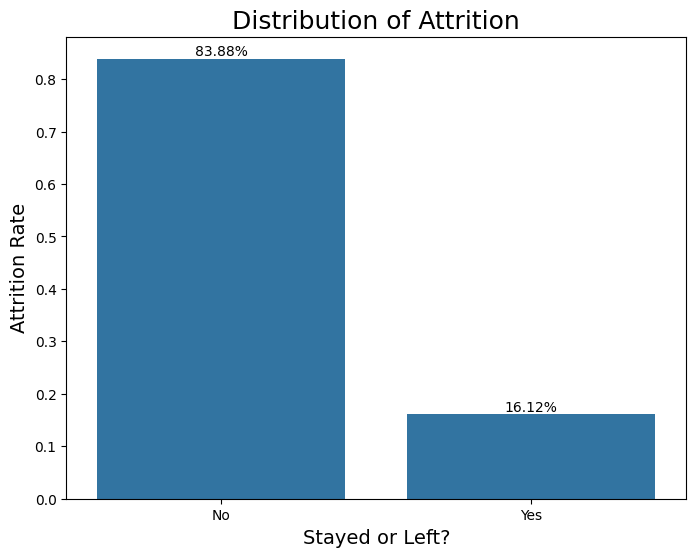

In [15]:
#we are doing binary classification problem here. Our target variable is Attrition. 
#First look at the distribution of attrition using the bar plot below

attr_rate=data_df['Attrition'].value_counts(normalize=True)

plt.figure(figsize=(8,6))

b=sns.barplot(x=data_df.Attrition.value_counts(normalize=True).index, y=data_df.Attrition.value_counts(normalize=True))

for p in b.patches:
    b.annotate(f'{p.get_height() * 100:.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
b.axes.set_title("Distribution of Attrition",fontsize=18)
b.set_xlabel("Stayed or Left?",fontsize=14)
b.set_ylabel("Attrition Rate",fontsize=14)
#b.bar_label(b.containers[0])


#As can be seen from the figure we have imbalance data set with 83.88% of employee choose to stay (Attrition=No), while the remaining 16.12% chose to leave the company (Attrition=Yes)

#As expected, the 'Attrition' column shows a significant class imbalance 83.88% Attrition='No' and 16.12% Attrition='Yes'. 
#The imbalance should be addressed prior to model training to prevent overemphasis towards Attrition='No' class when our study focus is on the employees who attritition='Yes'.

attr_rate.head()

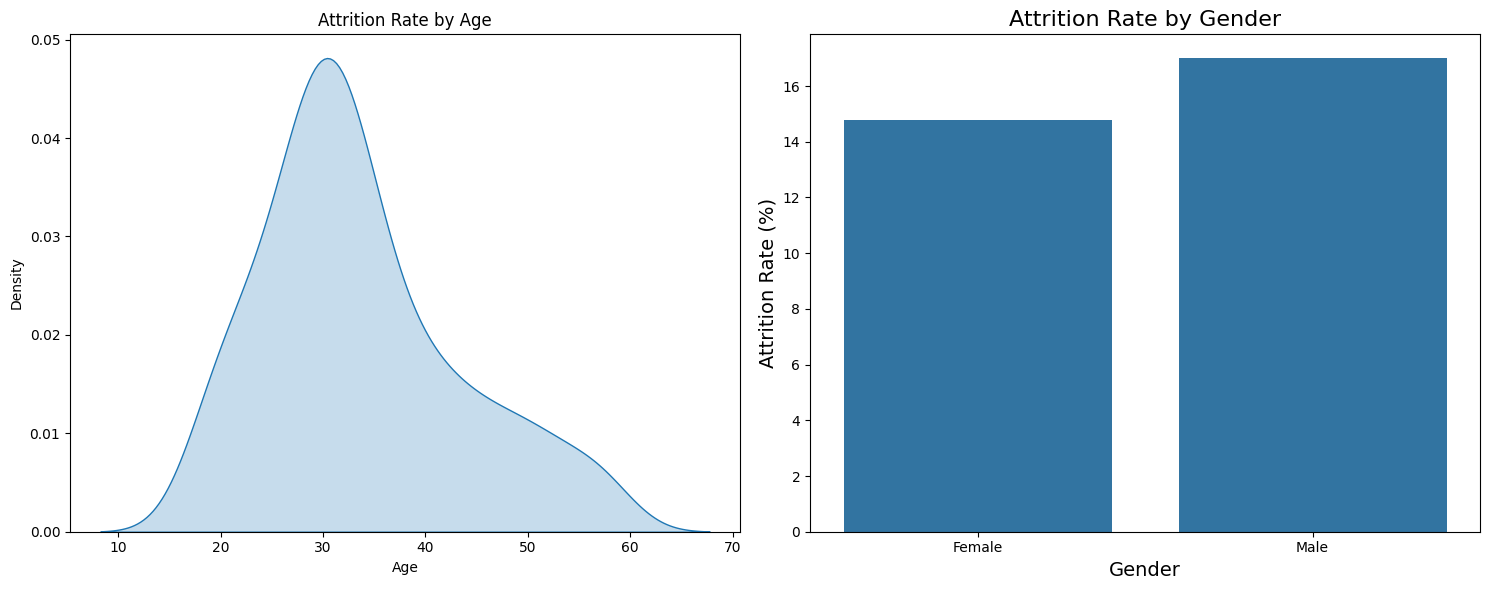

In [16]:
data_df1=data_df.copy()
df_attrition = data_df1[data_df1['Attrition'] == 'Yes']
# function to calculate attrition rate
def calculate_attrition_rate(df, column):
    attrition_counts = data_df1.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    attrition_rate = attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'AttritionRate']
    return attrition_rate_df

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

# Plot 1: KDE plot of Attrition Rate by Age 
sns.kdeplot(data=df_attrition, x='Age', fill=True, ax=axes[0])
axes[0].set_title('Attrition Rate by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

# Plot 2: Bar plot of Attrition Rate by Gender 
attrition_rate_df = calculate_attrition_rate(data_df1, 'Gender')
sns.barplot(data=attrition_rate_df, x='Gender', y='AttritionRate', ax=axes[1])
axes[1].set_title(f'Attrition Rate by Gender',fontsize=16)
axes[1].set_xlabel('Gender',fontsize=14)
axes[1].set_ylabel('Attrition Rate (%)',fontsize=14)

plt.tight_layout()
plt.show()

Attrition by Age:

Younger employees, especially those in the 30-35 age group, appear to be more likely than other age groups to leave a company. This could be due to a number of factors, including a search for new experiences, dissatisfaction with salary or career path, or a more attractive job offer elsewhere. Older employees tend to have greater job stability. This may be due to a number of factors, such as a higher level of commitment to the company, the difficulty of finding a new job at an older age, or the existence of mandatory retirement benefits. Attrition by Gender There is a significant difference in turnover rates between men and women. Male employees tend to leave more often than female employees. However, this could be due to the imbalance in the sample of both groups.

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

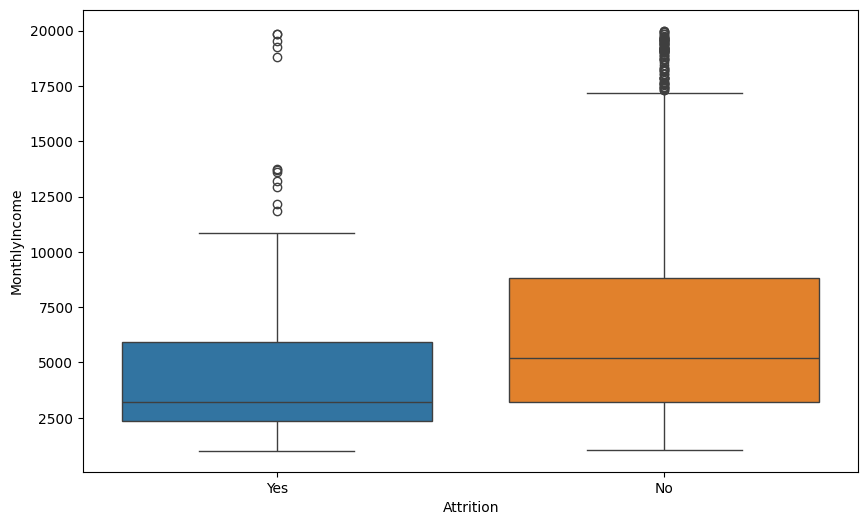

In [17]:
# Plot 1: Boxplot of Attrition Rate by Monthly Income

plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome',x ='Attrition',data=data_df1,hue="Attrition")

In [18]:
#obviouly lower monthly income will lead to higher attrition rate

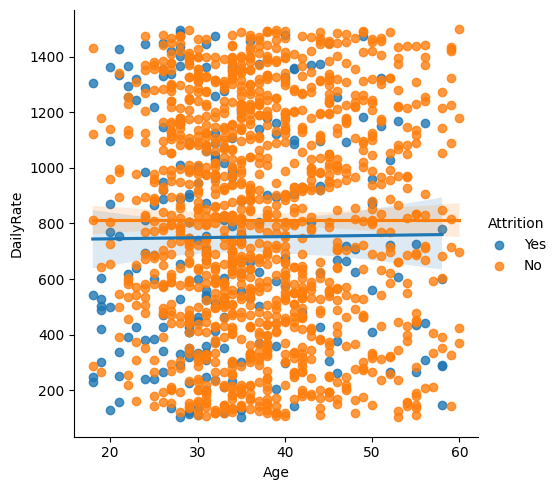

In [19]:
sns.lmplot(x = 'Age',y = 'DailyRate',hue = 'Attrition',data=data_df1)


In [20]:
#cant see the pattern clearly here

In [21]:
#data_df1=data_df.copy()
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

data_df1['Education_cat'] = data_df1['Education'].replace(education_map)
data_df1['Education_cat']

0             College
1       Below College
2             College
3              Master
4       Below College
            ...      
1465          College
1466    Below College
1467         Bachelor
1468         Bachelor
1469         Bachelor
Name: Education_cat, Length: 1470, dtype: object

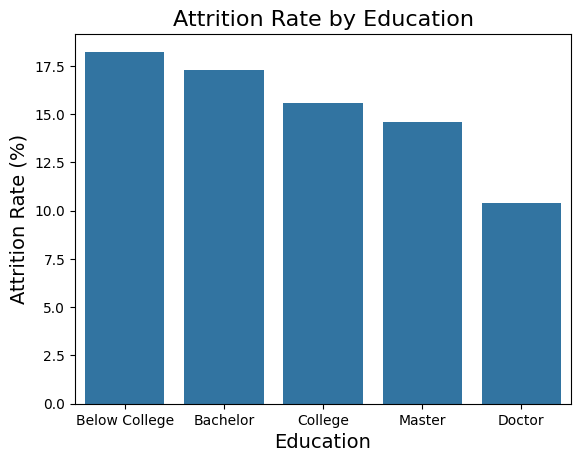

In [22]:
attrition_rate_df = calculate_attrition_rate(data_df1, 'Education_cat')
attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
sns.barplot(data=attrition_rate_df, x='Education_cat', y='AttritionRate')
plt.title(f'Attrition Rate by Education',fontsize=16)
plt.xlabel('Education',fontsize=14)
plt.ylabel('Attrition Rate (%)',fontsize=14)

plt.show()

#attrition rate breakdown by education level shows highest education (doctor) has the lowest attrion rate, below college has the highest attrition rate

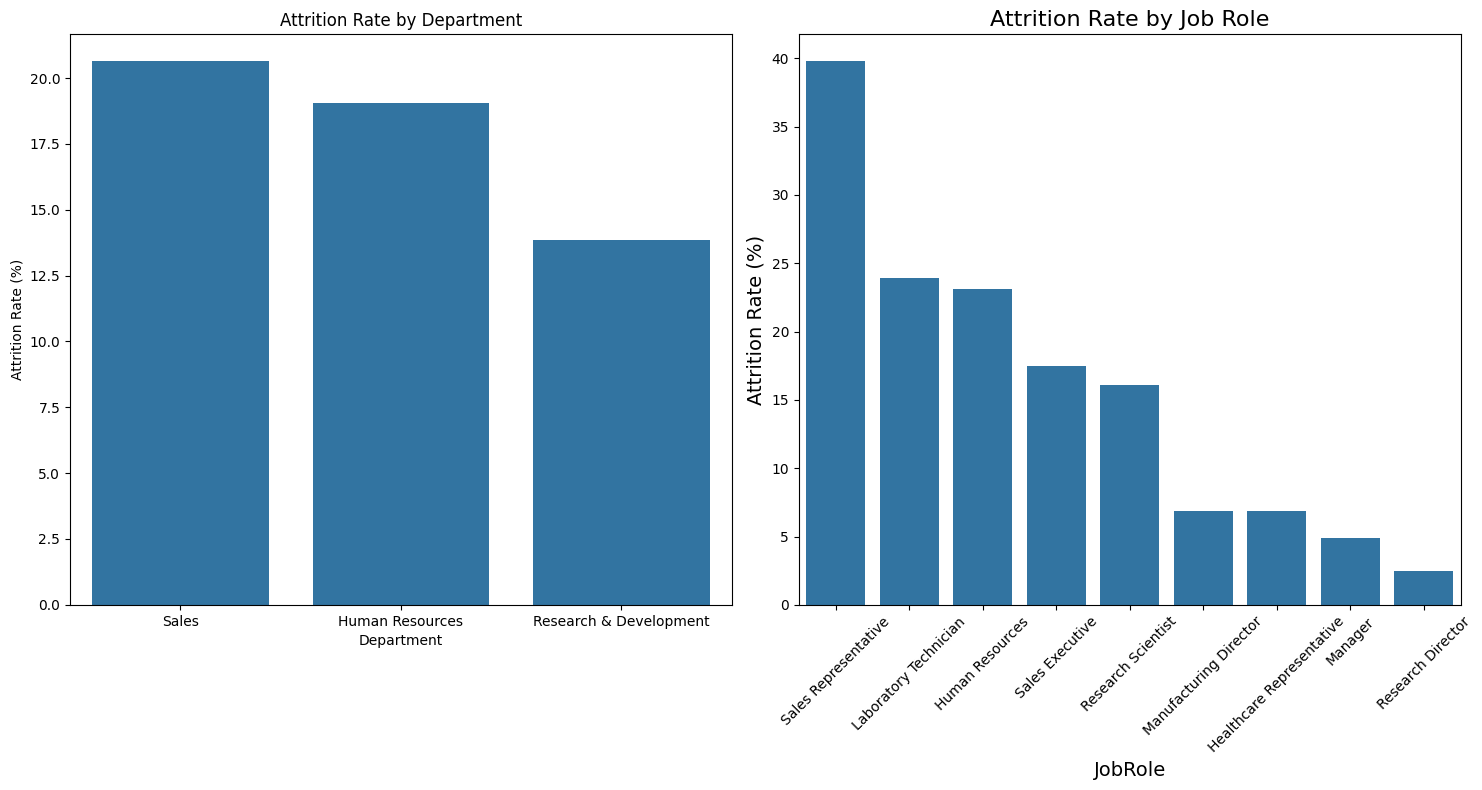

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

# Plot 1: KDE plot of Attrition Rate by Dept
attrition_rate_df = calculate_attrition_rate(data_df1, 'Department')
attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
sns.barplot(data=attrition_rate_df, x='Department', y='AttritionRate', ax=axes[0])
axes[0].set_title(f'Attrition Rate by Department')
axes[0].set_xlabel('Department')
axes[0].set_ylabel('Attrition Rate (%)')

# Plot 2: Bar plot of Attrition Rate by Job Role
attrition_rate_df = calculate_attrition_rate(data_df1, 'JobRole')
attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
sns.barplot(data=attrition_rate_df, x='JobRole', y='AttritionRate', ax=axes[1])
axes[1].set_title(f'Attrition Rate by Job Role',fontsize=16)
axes[1].set_xlabel('JobRole',fontsize=14)
axes[1].set_ylabel('Attrition Rate (%)',fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The sales department and the positions of sales representative and lab technician have high turnover rates. This may be due to factors such as high work pressure, unattainable sales goals, or lack of job satisfaction. The research and development department and the positions of research scientist and research director have low turnover rates. This may be due to the challenging nature of the work, greater opportunities for career development, or a more supportive work environment.

Based on the analysis of the above chart, it can be concluded that the turnover rate is influenced by the department and position held. Employees in the sales department and those holding the positions of sales representative and laboratory technician tend to leave the company more often than employees in the research and development department and those holding the positions of research scientist and research director. This difference may be due to factors such as job pressure, career development opportunities, and job satisfaction

#Exploring what factors strongly affect attrition rate.
#we have our categorical columns we want to explore how important it is to the attrition rate: \
#JobInvolvement, Environment Satisfaction, Job Satisfaction, Relationship Satisfaction, Work-Life Balance.

#Hypothesis: It is likely that the "Low" rating within each category will exhibit a higher attrition rate.
#This assumption is based on the notion that these attributes can directly impact an individual's decision to leave the company. 
#They are closely linked to satisfaction with the job involment , work-life balance. etc

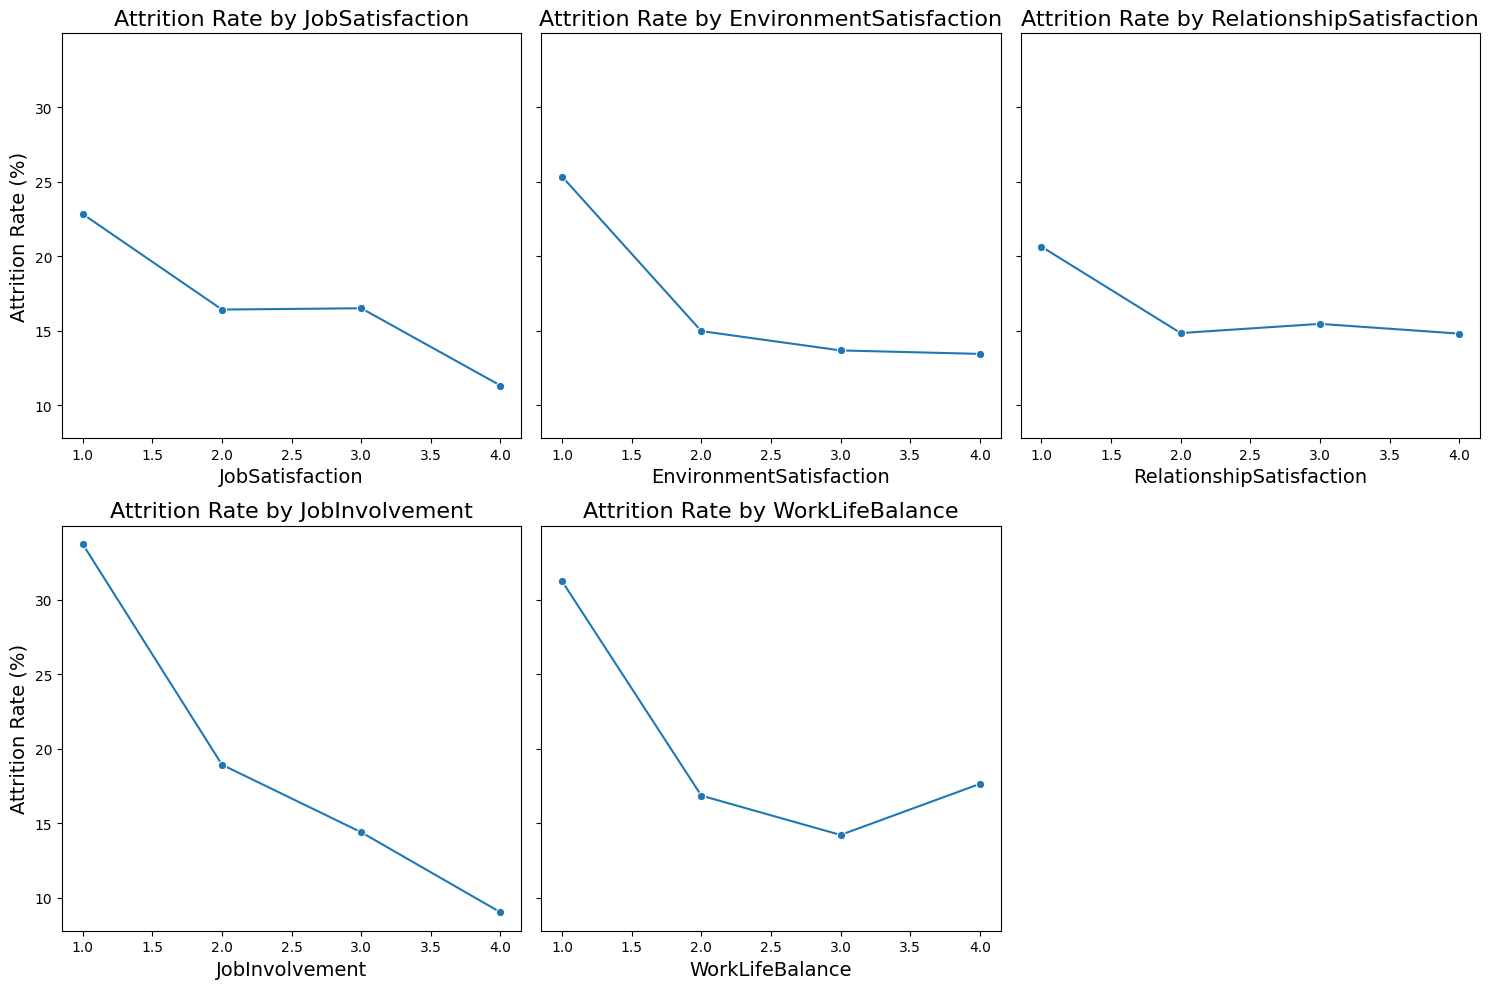

In [24]:
#List of satisfaction related columns
satisfaction_cols = [
    'JobSatisfaction', 'EnvironmentSatisfaction',
    'RelationshipSatisfaction', 'JobInvolvement',
    'WorkLifeBalance'
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

# Flatten axes
axes = axes.flatten()

# Plot indiviually
for i, col in enumerate(satisfaction_cols):
    attrition_rate_df = calculate_attrition_rate(data_df1, col)
    sns.lineplot(data=attrition_rate_df, x=col, y='AttritionRate', marker='o', ax=axes[i])
    axes[i].set_title(f'Attrition Rate by {col}',fontsize=16)
    axes[i].set_xlabel(col,fontsize=14)
    axes[i].set_ylabel('Attrition Rate (%)',fontsize=14)

if len(satisfaction_cols) % 2 != 0:
    fig.delaxes(axes[-1])

# padding between plots
plt.tight_layout()
plt.show()

#EnvironmentSatisfaction affect on the Attrition rate #environment satisfaction strongly related to attrition. when environment satisfaction is low, the employees likely to leave and vice versa #How JobInvolvement affect the attrition rate #when the job involment is high, the attrition is low and vice versa Job Satisfaction: Employees with low levels of job satisfaction tend to leave more often. This suggests that aspects of the job itself, such as tasks, responsibilities, and challenges, strongly influence an employee's decision to stay or leave. Environmental Satisfaction: A work environment that is uncomfortable, unsupportive, or inconsistent with an employee's values may encourage them to seek employment elsewhere. Relationship satisfaction: Good relationships with co-workers and supervisors can increase a sense of belonging and loyalty to the organization, thereby reducing turnover. Job Involvement: Employees who feel engaged in their work tend to be more loyal and committed to the organization. Work-life balance: A good work-life balance is very important to employees. Employees who feel that their work interferes with their personal lives are more likely to leave the company. In addition, the results of the analysis show a strong correlation between the level of job involvement and the level of turnover. Employees with low levels of job involvement tend to leave the organization more frequently. This suggests that a lack of job involvement, which may be caused by a lack of career development opportunities or a lack of challenge in the job, may encourage employees to seek more fulfilling work elsewhere.

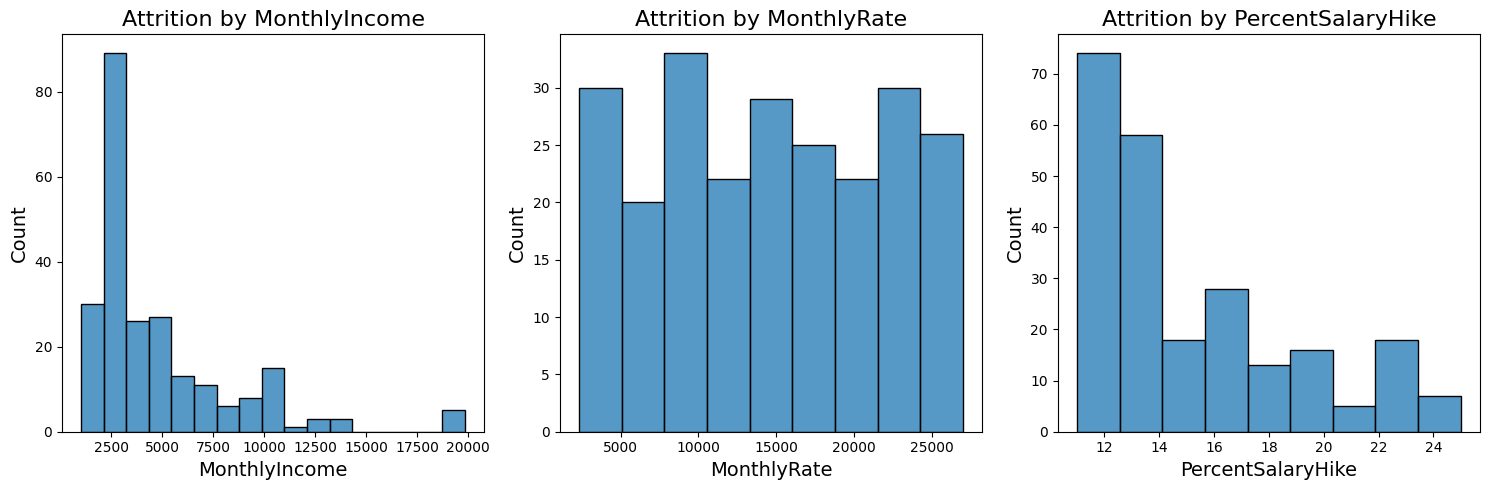

In [25]:
#Let's look at salary and benefit related factors
salary_col = ['MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for i, col in enumerate(salary_col):
    sns.histplot(data=df_attrition, x=col, ax=axes[i])
    axes[i].set_title(f'Attrition by {col}',fontsize=16)
    #axes[i].set_xlabel(col,fontsize=14)
    axes[i].set_xlabel(col,fontsize=14)
    axes[i].set_ylabel('Count',fontsize=14)
    
plt.tight_layout()
plt.show()

Turnover by monthly income

This chart shows that most of the employees who left had a monthly income in the range of 5,000 to 7,500. There is a significant decrease in the turnover rate for employees with a monthly income above 7,500, indicating that employees with higher salaries tend to stay with the company longer. Turnover by Monthly Rate: The Turnover by Monthly Rate graph does not show a clear pattern between salary levels and turnover rates. Turnover fluctuates randomly across different salary ranges.

Turnover by Percent Salary Increase:

This chart shows that employees who receive lower salary increases (below 16%) tend to have higher turnover rates. The higher the percentage increase, the lower the turnover rate. This shows that a significant salary increase can be an effective retention factor.

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

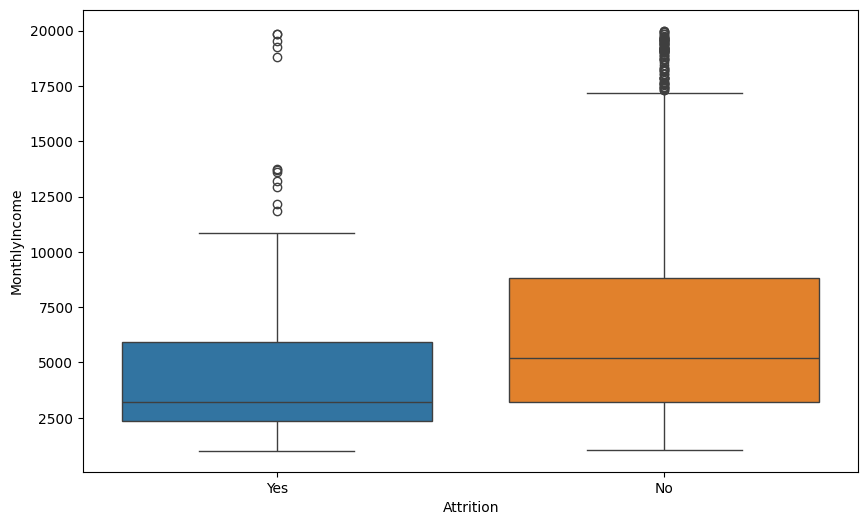

In [26]:
# Plot 1: Box plot of Attrition Rate by Monthly Income

plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome',x ='Attrition',data=data_df1,hue="Attrition")

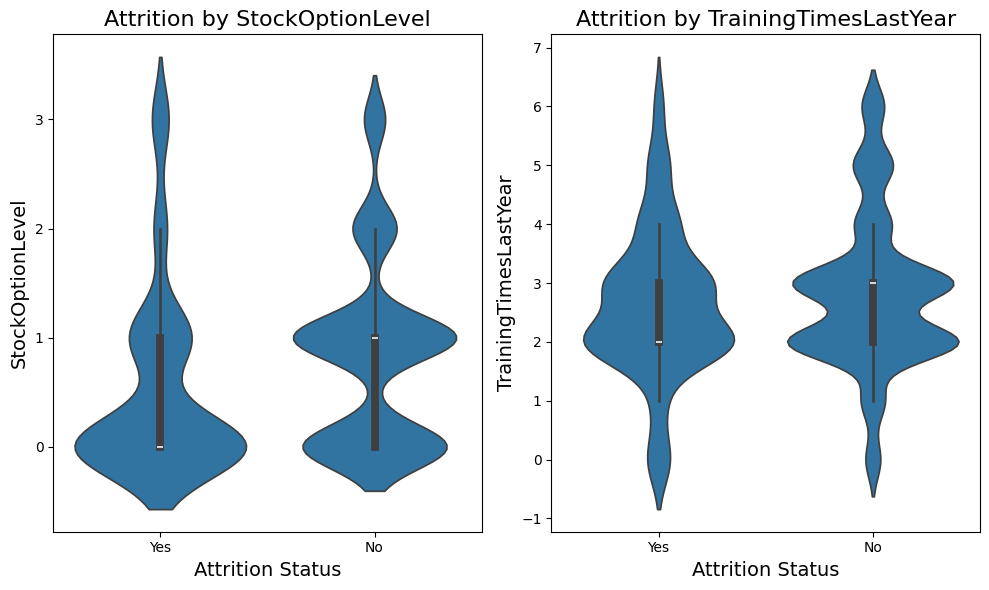

In [27]:
benefit_col = ['StockOptionLevel', 'TrainingTimesLastYear']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

for i, col in enumerate(benefit_col):
    sns.violinplot(data=data_df1, x='Attrition', y=col, ax=axes[i])
    axes[i].set_title(f'Attrition by {col}',fontsize=16)
    axes[i].set_xlabel('Attrition Status',fontsize=14)
    axes[i].set_ylabel(col,fontsize=14)
    
plt.tight_layout()
plt.show()

Stock options have a positive impact on employee retention. Employees who own more shares tend to be more loyal and stay with the company longer. Training opportunities also play an important role in employee retention. Employees who have more training opportunities tend to be happier and more motivated to stay with the company.

#PREPROCESSING THE DATA

#drop unneeded column: Over18, EmployeeCount, EmployeeNumber,and standardHours
#the minimum age is 18,so 'Over18' column can be dropped #The 'EmployeeCount' column consists of all 1's, std=0, we dont need this column #The same with 'StandardHours' column consits of all 40's, they are all identical indicated by the standard deviation being 0, we can drop this column as well #The 'EmployeeNumber' column is merely the number for each employee, we dont need the column


In [28]:
data_df2=data_df.copy()
data_df2['Attrition']=data_df2['Attrition'].apply(lambda x:0 if x=='No' else 1)
data_df2['Attrition']
#data_df.drop('EmployeeCount',axis=1,inplace=True)


0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [29]:
data_df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

data_df.shape

In [30]:
#drop unneeded columns/uniformed columns, useless features
#drop unneeded column: Over18, EmployeeCount, EmployeeNumber,and standardHours 
#the minimum age is 18,so 'Over18' column can be dropped 
#The 'EmployeeCount' column consists of all 1's, std=0, we dont need this column 
#The same with 'StandardHours' column consits of all 40's, they are all identical indicated by the standard deviation being 0, we can drop this column as well 
#The 'EmployeeNumber' column is merely the number for each employee, we dont need the column
data_df2.drop('EmployeeCount',axis=1,inplace=True)
data_df2.drop('StandardHours',axis=1,inplace=True)
data_df2.drop('EmployeeNumber',axis=1,inplace=True)
data_df2.drop('Over18',axis=1,inplace=True)

In [31]:
data_df2.shape

(1470, 31)

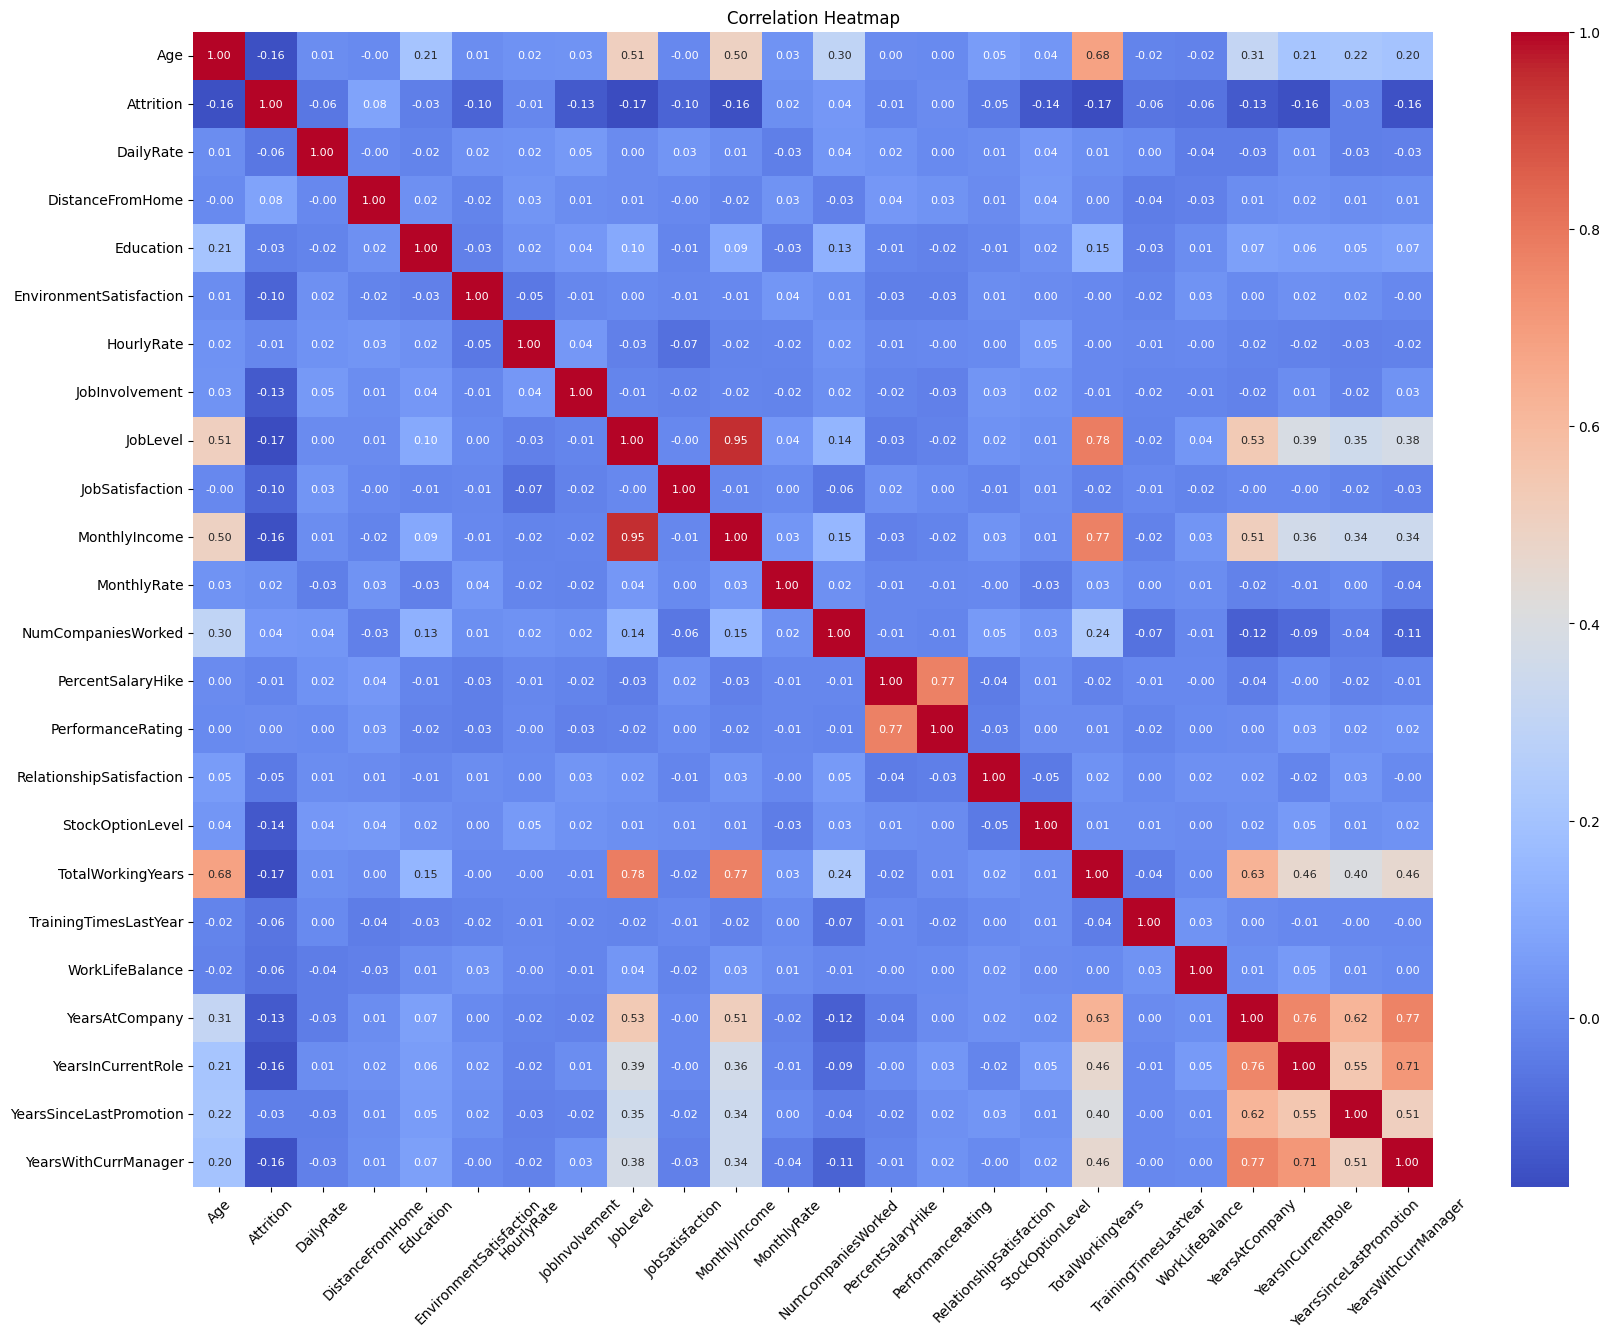

In [32]:
#What are the factors that contribute to Attrition?
#heatmap
corr_matrix=data_df2.loc[:,data_df2.dtypes=='int64'].corr()
plt.figure(figsize=(20, 15))  # Set the size of the heatmap
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 8})
ax.set(title='Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0);

#Multicollinearity: 'MonthlyIncome' is highly correlated with 'JobLevel' (0.95), suggesting that these variables might be conveying overlapping information. 'TotalWorkingYears' has strong positive correlations with 'JobLevel' (0.78) and 'MonthlyIncome' (0.77), which is expected as more experienced employees are likely to have higher job level and earnings. 
"YearsWithCurrManager" has high positive correlation with 'YearsAtCompany'(0.77), and 'YearsInCurrentRole' (0.71) -- this may indicate employees tend to stay with the same manager in the same role.
For the above reason, using cutoff of 0.7 correlation coefficient, the columns MonthlyIncome,TotalWorkingYears, YearsInCurrentRole and YearsWithCurrManager will be removed, and the columns JobLevel and YearsAtCompany will be retained.
It will reduce the possibility of fatures multicollinearity and will improve model accuracy as well

For MonthlyIncome, the high correlation with job level and sensitivity around salary makes it both redundant and hard to work with in policy change management. For TotalWorkingYears, the data will be encapsulated in other features like YearsAtCompany. For YearsInCurrentRole and YearsWithCurrManager, the data will not pose much additional insights beyond YearsAtCompany, considering organisational structures/functional specialisations (e.g. Accounting) are what keep individuals in similar Department and role.

In [33]:
numeric_df = data_df2.select_dtypes(include='number')
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EnvironmentSatisfaction   1470 non-null   int64
 6   HourlyRate                1470 non-null   int64
 7   JobInvolvement            1470 non-null   int64
 8   JobLevel                  1470 non-null   int64
 9   JobSatisfaction           1470 non-null   int64
 10  MonthlyIncome             1470 non-null   int64
 11  MonthlyRate               1470 non-null   int64
 12  NumCompaniesWorked        1470 non-null   int64
 13  PercentSalaryHike         1470 non-null   int64
 14  PerformanceRating         1470 non-null 

<Axes: >

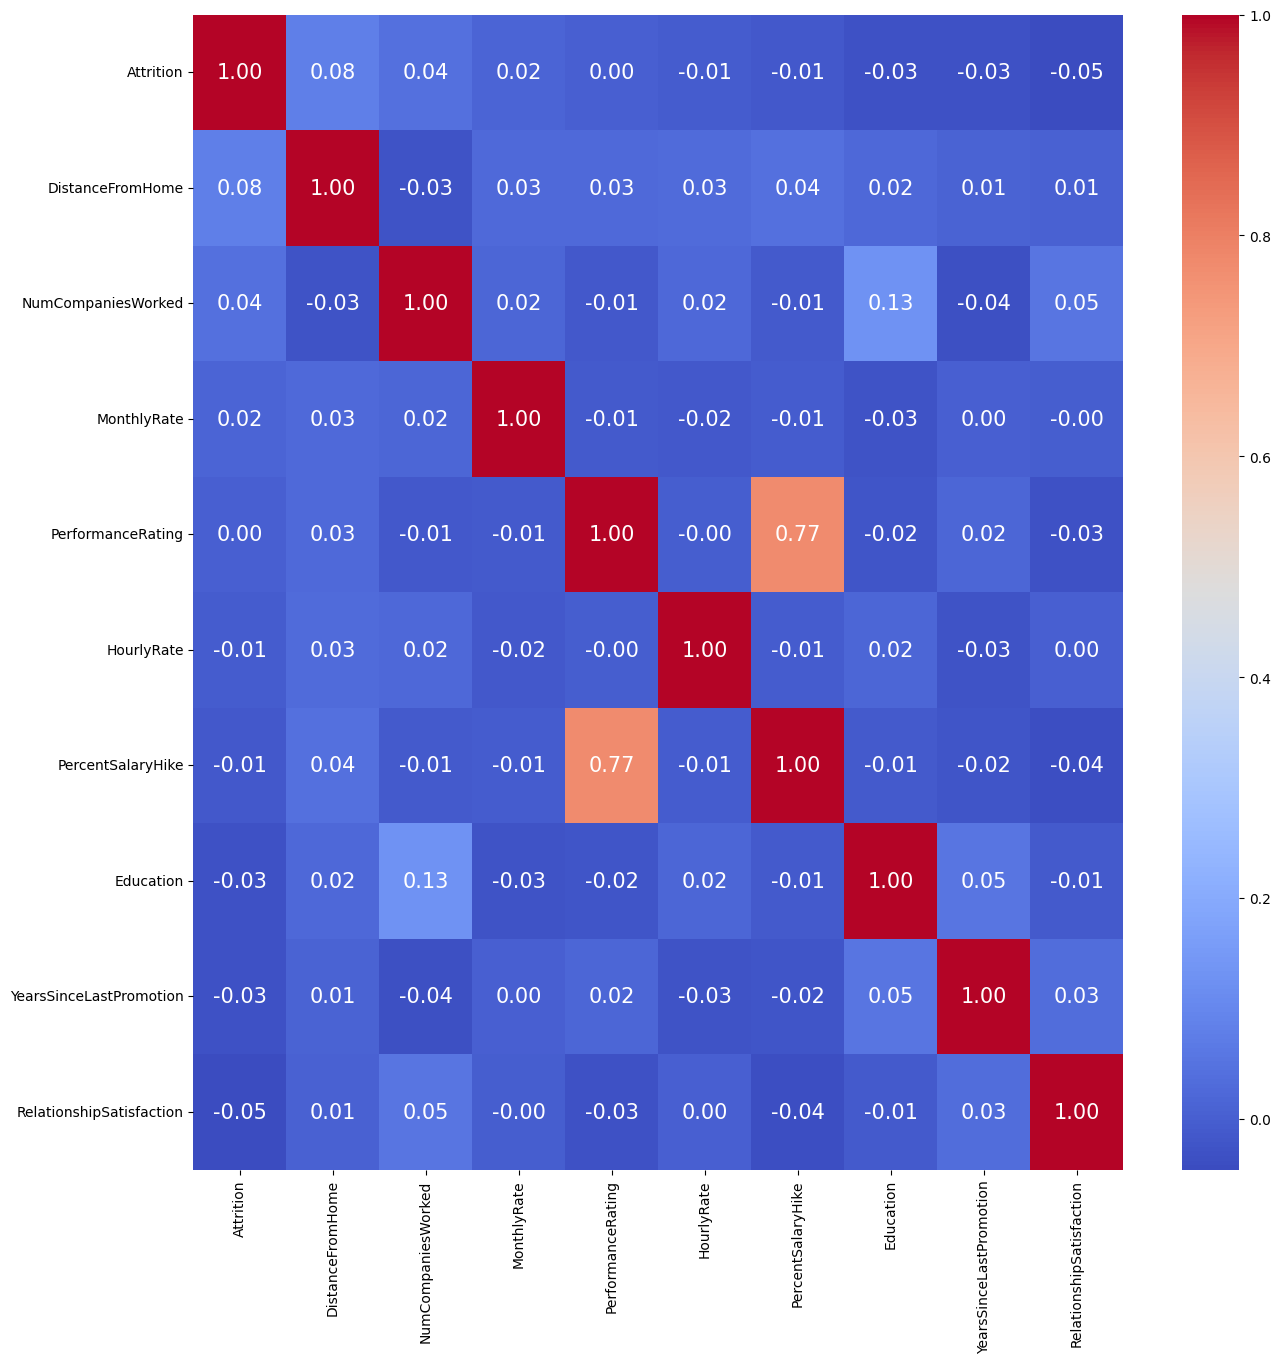

In [34]:
 #Selects 10 features that has the highest correlation to Attrition
col =numeric_df.corr().nlargest(10, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_df[col].corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":15})

#these r top 10 factors influencing attrition rate: distanceFromHOme, NumCompaniesWorked, MonthlyRate, PerformanceRating, HourlyRate, PercentSalaryHike,Education,YearsSinceLastPromotion,RelationshipSatisfaction


In [35]:
#Preprocessing, prepare our data for model training

In [36]:
#the original dataset data_df has 4 irrelevant columns: EmployeeCount,
#EmployeeNumber, Over18, and StandardHour. Remove the columns  for more accuracy.
data_df.drop('EmployeeCount',axis=1,inplace=True)
data_df.drop('StandardHours',axis=1,inplace=True)
data_df.drop('EmployeeNumber',axis=1,inplace=True)
data_df.drop('Over18',axis=1,inplace=True)

In [37]:
data_df.shape

(1470, 31)

In [38]:
#drop columns MonthlyIncome,TotalWorkingYears, YearsInCurrentRole and YearsWithCurrManager that could cause multicollinearity and to improve model accuracy
data_df.drop('MonthlyIncome',axis=1,inplace=True)
data_df.drop('TotalWorkingYears',axis=1,inplace=True)
data_df.drop('YearsInCurrentRole',axis=1,inplace=True)
data_df.drop('YearsWithCurrManager',axis=1,inplace=True)

In [39]:
X=data_df
y=data_df.iloc[:,1]
X.drop('Attrition',axis=1,inplace=True)


In [40]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

The dataset have 7 categorical data, we have to change them to int data by creating 7 dummy vars

In [41]:
dummy_BusinessTravel = pd.get_dummies(data_df['BusinessTravel'],prefix ='BusinessTravel')
dummy_Department = pd.get_dummies(data_df['Department'],prefix ='Department')
dummy_EducationField = pd.get_dummies(data_df['EducationField'],prefix ='EducationField')
dummy_Gender = pd.get_dummies(data_df['Gender'],prefix ='Gender',drop_first=True)
dummy_JobRole = pd.get_dummies(data_df['JobRole'],prefix ='JobRole')
dummy_MaritalStatus = pd.get_dummies(data_df['MaritalStatus'],prefix ='MaritalStatus')
dummy_OverTime = pd.get_dummies(data_df['OverTime'],prefix ='OverTime',drop_first=True)


In [42]:
# Adding these dummy variable to input X
X = pd.concat([X, dummy_BusinessTravel,dummy_Department,dummy_EducationField,dummy_Gender,dummy_JobRole,dummy_MaritalStatus,\
dummy_OverTime], axis = 1)


In [43]:
# Removing the categorical data
X.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'],axis=1,inplace=True)


In [44]:
print(X.shape)
print(y.shape)

(1470, 45)
(1470,)


#Model#1 : LOGISTIC REGRESSION
we will first try to build a logistic regression model, which is specifically designed for binary classification problems and the most straightforward model in our case

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyRate                        1470 non-null   int64
 10  NumCompaniesWorked                 1470 non-null   int64
 11  PercentSalaryHike                  1470 non-null   int64
 12  PerformanceRating   

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_predict,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,make_scorer, precision_score, recall_score, f1_score, roc_auc_score

In [47]:
#Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify=y)


In [48]:
LR_model=LogisticRegression(solver='liblinear')
LR_model.fit(X_train,y_train)
y_pred=LR_model.predict(X_test)
y_train_pred=LR_model.predict(X_train)

train_accuracy=accuracy_score(y_train,y_train_pred)
train_cf_matrix=confusion_matrix(y_train,y_train_pred)
train_cl_report=classification_report(y_train,y_train_pred)

test_accuracy=accuracy_score(y_test,y_pred)
test_cf_matrix=confusion_matrix(y_test,y_pred)
test_cl_report=classification_report(y_test,y_pred)

In [49]:
print("TRAINING RESULTS: \n===============================")
print("Accuracy:",train_accuracy)
print("Confusion Matrix:\n",train_cf_matrix)
print("Classification Report:\n",train_cl_report)
print("TEST RESULTS: \n===============================")
print("Accuracy:",test_accuracy)
print("Confusion Matrix:\n",test_cf_matrix)
print("Classification Report:\n",test_cl_report)

TRAINING RESULTS: 
Accuracy: 0.891156462585034
Confusion Matrix:
 [[975  11]
 [117  73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       986
           1       0.87      0.38      0.53       190

    accuracy                           0.89      1176
   macro avg       0.88      0.69      0.74      1176
weighted avg       0.89      0.89      0.87      1176

TEST RESULTS: 
Accuracy: 0.8775510204081632
Confusion Matrix:
 [[242   5]
 [ 31  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.76      0.34      0.47        47

    accuracy                           0.88       294
   macro avg       0.82      0.66      0.70       294
weighted avg       0.87      0.88      0.86       294



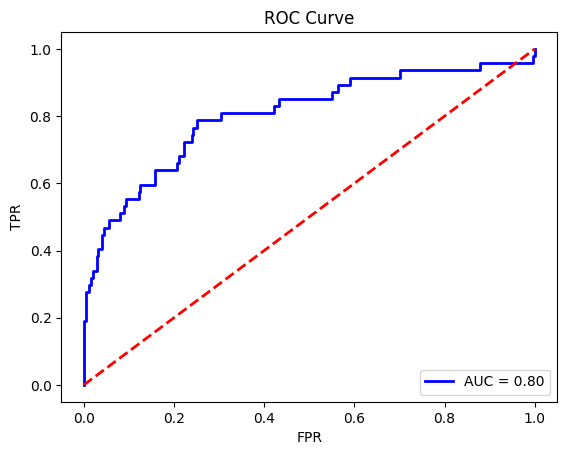

AUC-ROC Score: 0.8043759152381773 



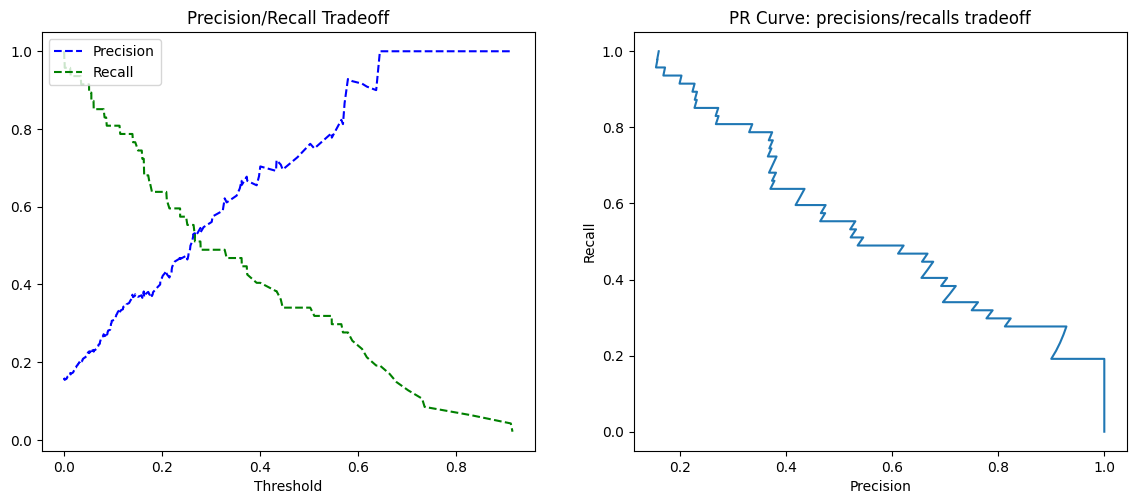

In [50]:
#plot ROC curve with AUC-ROC score
ypp=LR_model.predict_proba(X_test)[:,1]
fpr,tpr,th=roc_curve(y_test,ypp)
auc=roc_auc_score(y_test,ypp)

lw = 2
plt.plot(fpr, tpr, color='blue', lw=lw, label='AUC = %0.2f' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--') 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC-ROC Score:", auc, "\n")

#plot precision/recall tradeoff and PR curve for precision/recalls tradeoff
precisions, recalls, thresholds=precision_recall_curve(y_test,ypp)
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.title("Precision/Recall Tradeoff")
plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");
    

The Logistic Regression model has F1-score of 0.47 and AUC=0.8 for attrition="Yes". Considering only small percentage of employees left the company, the Linear Regression model is doing a good job in predicting attrition. We have imbalance dataset. The F1 score is generally better than the area under the curve (AUC) for imbalanced datasets when the minority class is of interest.
The F1 score is the harmonic mean of precision and recall, which balances the importance of both metrics. It's a more robust evaluation metric than accuracy because it gives a fair representation of a model's performance despite class imbalance. 
 
AUC
The AUC is a single value that summarizes a model's overall performance. It's useful for comparing the performance of multiple models. However, the AUC and ROC curve may not be well-suited for imbalanced problems because they may be biased toward the majority class. 

The accuracy score may also be less useful here as there is lesser emphasis on the minority class (Attrition - 'Yes') with better results in the majority class.



 #Now we will perform hyperparameter tuning for our logistic regression model via GridSearchCV (with Cross Validation = 5) to improve the result


Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l1'}

Accuracy Tuned for Logistic Regression: 0.8605442176870748

Confusion Matrix Tuned for Logistic Regression: [[237  10]
 [ 31  16]]

Classification Report Tuned for Logistic Regression:               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



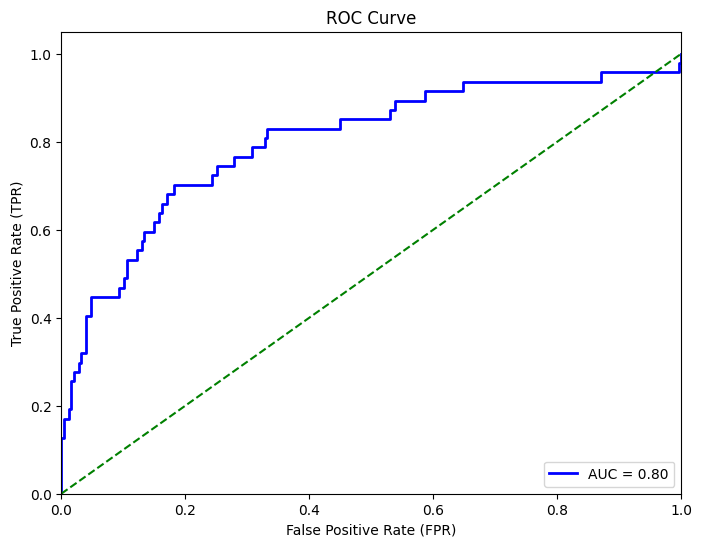

AUC-ROC Score: 0.8004134723059696


In [51]:
 # Hyperparameter Tuning
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'penalty': ['l1', 'l2'],   
}
#GridSearchCV
grid_search_lr=GridSearchCV(LogisticRegression(solver='liblinear',max_iter=1000), param_grid_lr,cv=5,n_jobs=-1)
grid_search_lr.fit(X_train,y_train)

best_params_lr=grid_search_lr.best_params_
best_estimator_lr=grid_search_lr.best_estimator_
best_estimator_lr.fit(X_train,y_train)

y_pred_tuned_lr=best_estimator_lr.predict(X_test)
accuracy_tuned_lr=accuracy_score(y_test,y_pred_tuned_lr)
cf_matrix_tuned_lr=confusion_matrix(y_test,y_pred_tuned_lr)
cl_report_tuned_lr=classification_report(y_test,y_pred_tuned_lr)

print("\nBest Parameters for Logistic Regression:", best_params_lr)
print("\nAccuracy Tuned for Logistic Regression:", accuracy_tuned_lr)
print("\nConfusion Matrix Tuned for Logistic Regression:", cf_matrix_tuned_lr)
print("\nClassification Report Tuned for Logistic Regression:", cl_report_tuned_lr)

#AUC ROC
y_prob_lr=best_estimator_lr.predict_proba(X_test)[:,1]
fpr_lr,tpr_lr,thresholds_lr=roc_curve(y_test,y_prob_lr)
roc_auc_lr=roc_auc_score(y_test,y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'AUC = {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC-ROC Score:", roc_auc_lr)


With the hyperparameter tuning, 
unexpectedly the F1-score drop slightly from 0.47 to 0.44 for Attrition['Yes] and the AUC-ROC score drop from 0.8043759152381773 
to 0.8002411921784823


Nonetheless, with the relatively small sample and lack of longitudinal employee data, such scores are decent in aiding the company to predict Attrition and work on tailored interventions.

We will seek to examine the data through a different model - Random Forest. Considering the numerous correlations across the features, the low F1 score in the logistic regression may be attributed to more non-linear and complex relationships across features and Attrition. There may also be more noisy data in this case as our hyperparameter tuning did not pose much benefit to the linear regression. This prompt us to utilise the Random Forest model to see if we can deal better with the possible presence of complex relationships and noisy data.


In [52]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100, bootstrap=False)
RF_model.fit(X_train,y_train)
y_pred=RF_model.predict(X_test)
y_train_pred=RF_model.predict(X_train)

train_accuracy=accuracy_score(y_train,y_train_pred)
train_cf_matrix=confusion_matrix(y_train,y_train_pred)
train_cl_report=classification_report(y_train,y_train_pred)

test_accuracy=accuracy_score(y_test,y_pred)
test_cf_matrix=confusion_matrix(y_test,y_pred)
test_cl_report=classification_report(y_test,y_pred)

In [53]:
print("TRAINING RESULTS: \n===============================")
print("Accuracy:",train_accuracy)
print("Confusion Matrix:\n",train_cf_matrix)
print("Classification Report:\n",train_cl_report)
print("TEST RESULTS: \n===============================")
print("Accuracy:",test_accuracy)
print("Confusion Matrix:\n",test_cf_matrix)
print("Classification Report:\n",test_cl_report)

TRAINING RESULTS: 
Accuracy: 1.0
Confusion Matrix:
 [[986   0]
 [  0 190]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

TEST RESULTS: 
Accuracy: 0.8503401360544217
Confusion Matrix:
 [[245   2]
 [ 42   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       247
           1       0.71      0.11      0.19        47

    accuracy                           0.85       294
   macro avg       0.78      0.55      0.55       294
weighted avg       0.83      0.85      0.80       294



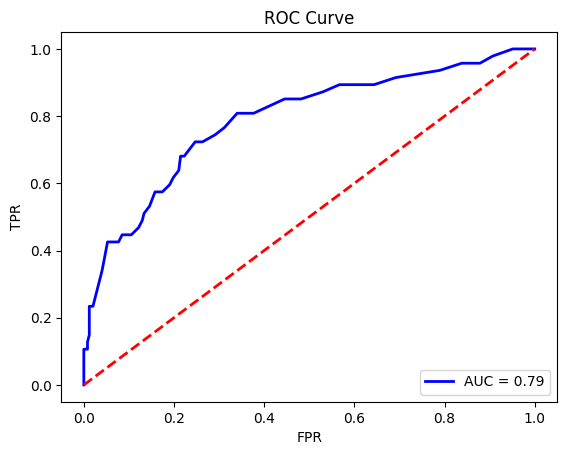

AUC-ROC Score: 0.7887845637005771 



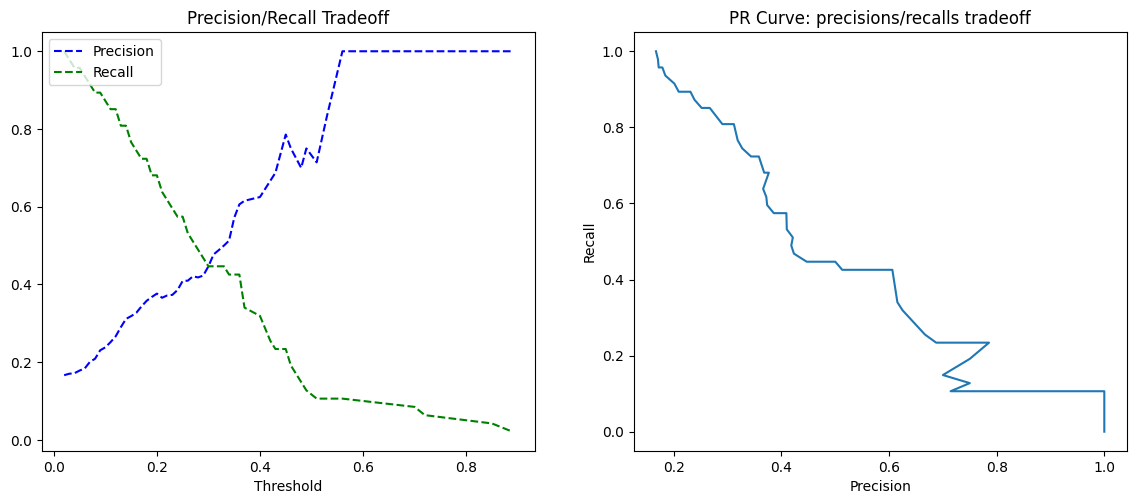

In [54]:
#plot ROC curve with AUC-ROC score
ypp=RF_model.predict_proba(X_test)[:,1]
fpr,tpr,th=roc_curve(y_test,ypp)
auc=roc_auc_score(y_test,ypp)

lw = 2
plt.plot(fpr, tpr, color='blue', lw=lw, label='AUC = %0.2f' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--') 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC-ROC Score:", auc, "\n")

#plot precision/recall tradeoff and PR curve for precision/recalls tradeoff
precisions, recalls, thresholds=precision_recall_curve(y_test,ypp)
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.title("Precision/Recall Tradeoff")
plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

In [55]:
# Random Forest
# Hyperparameter Tuning
#param_grid_rf = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [None, 10, 20],
#    'min_samples_split': [2, 5, 10]
#}
#param_grid_rf = { 
#    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
#    'max_features': ['auto', 'sqrt', 'log2']
#}
param_grid_rf = dict(
    n_estimators= [100, 500, 900],     
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
)

# GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_
best_estimator_rf.fit(X_train, y_train)

y_pred_tuned_rf = best_estimator_rf.predict(X_test)
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
cf_matrix_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)
cl_report_tuned_rf = classification_report(y_test, y_pred_tuned_rf)

print("\nBest Parameters (Random Forest):", best_params_rf)
print("Accuracy (Tuned Random Forest):", accuracy_tuned_rf)
print("Confusion Matrix (Tuned Random Forest):\n", cf_matrix_tuned_rf)
print("Classification Report (Tuned Random Forest):\n", cl_report_tuned_rf)


Best Parameters (Random Forest): {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Accuracy (Tuned Random Forest): 0.8537414965986394
Confusion Matrix (Tuned Random Forest):
 [[246   1]
 [ 42   5]]
Classification Report (Tuned Random Forest):
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       0.83      0.11      0.19        47

    accuracy                           0.85       294
   macro avg       0.84      0.55      0.55       294
weighted avg       0.85      0.85      0.80       294



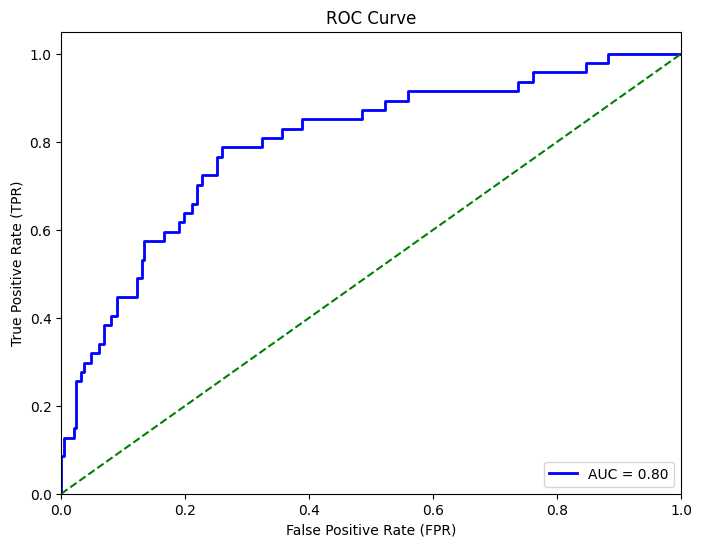

AUC-ROC Score (Random Forest): 0.7968817296924798


In [56]:
# AUC-ROC
y_prob_rf = best_estimator_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC-ROC Score (Random Forest):", roc_auc_rf)

Interestingly, the hyperparameter tuned Random Forest model did not perform as well as the logistic regression with a F1 score of 0.19 for Attrition['Yes] and an AUC score of 0.7968817296924798 (about the same w Logistic Regression model

While we hypothesized more complex and non-linear relationships across features and Attrition, the relatively poor performance of Random Forest in this context suggests that the underlying data may not exhibit strong non-linear dependencies.

Next, we will seek to improve the prediction modelling through Gradient Boosting method. As GB builds trees sequentially by weighing misclassified samples more heavily, it is possible that the model will provide higher predictive stats for Attrition.


TRAINING RESULTS: 
Accuracy: 0.9710884353741497
Confusion Matrix:
 [[986   0]
 [ 34 156]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       986
           1       1.00      0.82      0.90       190

    accuracy                           0.97      1176
   macro avg       0.98      0.91      0.94      1176
weighted avg       0.97      0.97      0.97      1176

TEST RESULTS: 
Accuracy: 0.8571428571428571
Confusion Matrix:
 [[241   6]
 [ 36  11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.65      0.23      0.34        47

    accuracy                           0.86       294
   macro avg       0.76      0.60      0.63       294
weighted avg       0.83      0.86      0.83       294



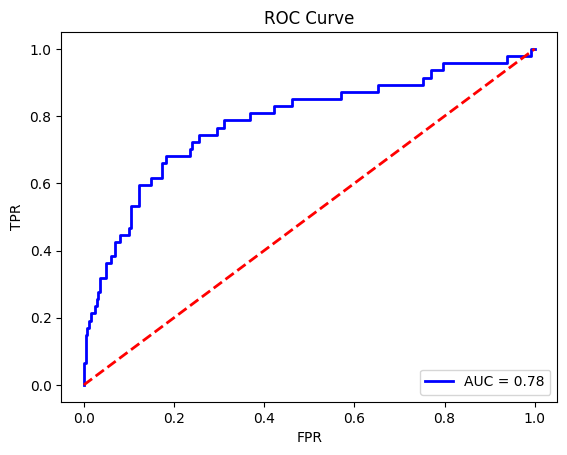

AUC-ROC Score: 0.7849082608321131 



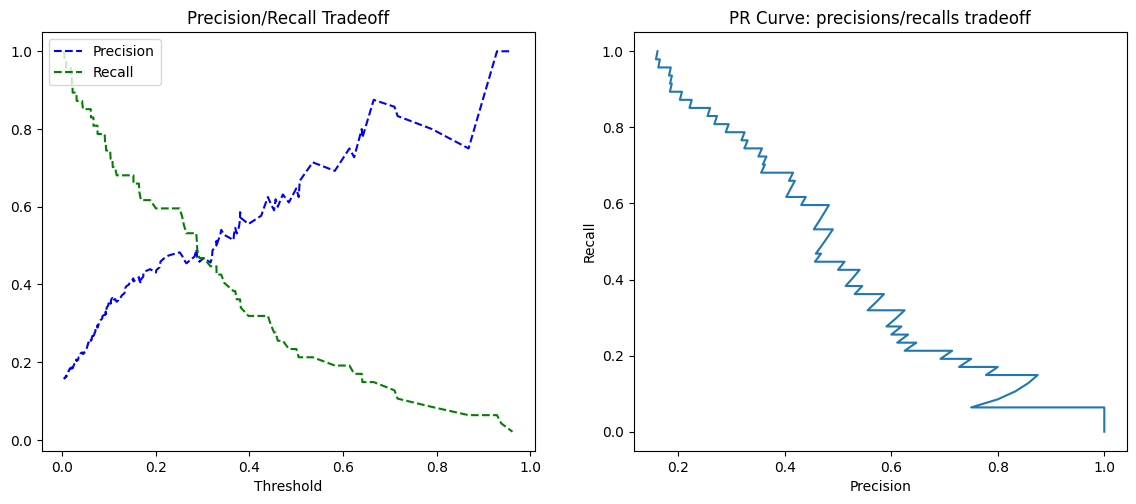

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model=GradientBoostingClassifier(n_estimators=300, learning_rate=0.05,random_state=100)
GB_model.fit(X_train,y_train)
y_pred=GB_model.predict(X_test)
y_train_pred=GB_model.predict(X_train)

train_accuracy=accuracy_score(y_train,y_train_pred)
train_cf_matrix=confusion_matrix(y_train,y_train_pred)
train_cl_report=classification_report(y_train,y_train_pred)

test_accuracy=accuracy_score(y_test,y_pred)
test_cf_matrix=confusion_matrix(y_test,y_pred)
test_cl_report=classification_report(y_test,y_pred)


print("TRAINING RESULTS: \n===============================")
print("Accuracy:",train_accuracy)
print("Confusion Matrix:\n",train_cf_matrix)
print("Classification Report:\n",train_cl_report)
print("TEST RESULTS: \n===============================")
print("Accuracy:",test_accuracy)
print("Confusion Matrix:\n",test_cf_matrix)
print("Classification Report:\n",test_cl_report)

#plot ROC curve with AUC-ROC score
ypp=GB_model.predict_proba(X_test)[:,1]
fpr,tpr,th=roc_curve(y_test,ypp)
auc=roc_auc_score(y_test,ypp)

lw = 2
plt.plot(fpr, tpr, color='blue', lw=lw, label='AUC = %0.2f' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--') 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC-ROC Score:", auc, "\n")

#plot precision/recall tradeoff and PR curve for precision/recalls tradeoff
precisions, recalls, thresholds=precision_recall_curve(y_test,ypp)
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.title("Precision/Recall Tradeoff")
plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");


Best Parameters (Gradient Boosting): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy (Tuned Gradient Boosting): 0.8503401360544217
Confusion Matrix (Tuned Gradient Boosting):
 [[240   7]
 [ 37  10]]
Classification Report (Tuned Gradient Boosting):
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.59      0.21      0.31        47

    accuracy                           0.85       294
   macro avg       0.73      0.59      0.61       294
weighted avg       0.82      0.85      0.82       294



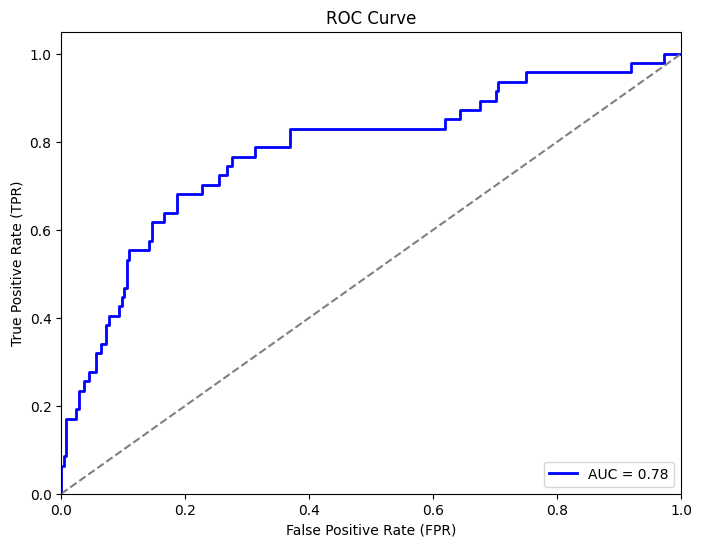

AUC-ROC Score (Gradient Boosting): 0.7799121371349814


In [59]:
# Gradient Boosting
# Hyperparameter Tuning
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# GridSearchCV
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),param_grid=param_grid_gb,
                cv=5, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
best_params_gb = grid_search_gb.best_params_
best_estimator_gb = grid_search_gb.best_estimator_
best_estimator_gb.fit(X_train, y_train)

y_pred_tuned_gb = best_estimator_gb.predict(X_test)
accuracy_tuned_gb = accuracy_score(y_test, y_pred_tuned_gb)
cf_matrix_tuned_gb = confusion_matrix(y_test, y_pred_tuned_gb)
cl_report_tuned_gb = classification_report(y_test, y_pred_tuned_gb)

print("\nBest Parameters (Gradient Boosting):", best_params_gb)
print("Accuracy (Tuned Gradient Boosting):", accuracy_tuned_gb)
print("Confusion Matrix (Tuned Gradient Boosting):\n", cf_matrix_tuned_gb)
print("Classification Report (Tuned Gradient Boosting):\n", cl_report_tuned_gb)

# AUC-ROC
y_prob_gb = best_estimator_gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'AUC = {roc_auc_gb:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC-ROC Score (Gradient Boosting):", roc_auc_gb)

the hyperparameter tuned Gradient Boosting model has F1-score of 0.31 ,lower than Logistic Regression model but higher than Random Forest
The AUC-ROC score is the lowest 0.7794 

did not perform as well as the logistic regression with a F1 score of 0.42 for Attrition['Yes] and an AUC score of 0.78. It did, however, do better than the Random Forest model, likely due to the sequential learning algorithm. Ensemble methods tend to excel with non-linear relationships and interactions between features. The relatively poor performance of Random Forest and Gradient Boosting in this context suggests that the underlying data may indeed not be exhibiting strong non-linear dependencies.

With the analysis of this binary classification problem through 3 different models and hyperparameter-tuning, we will look at the results collectively in the next section.

Next, we will seek to improve the prediction modelling through XGBoost method. As GB builds trees sequentially by weighing misclassified samples more heavily, it is possible that the model will provide higher predictive stats for Attrition.

TRAINING RESULTS: 
Accuracy: 1.0
Confusion Matrix:
 [[986   0]
 [  0 190]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

TEST RESULTS: 
Accuracy: 0.8469387755102041
Confusion Matrix:
 [[238   9]
 [ 36  11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       247
           1       0.55      0.23      0.33        47

    accuracy                           0.85       294
   macro avg       0.71      0.60      0.62       294
weighted avg       0.82      0.85      0.82       294



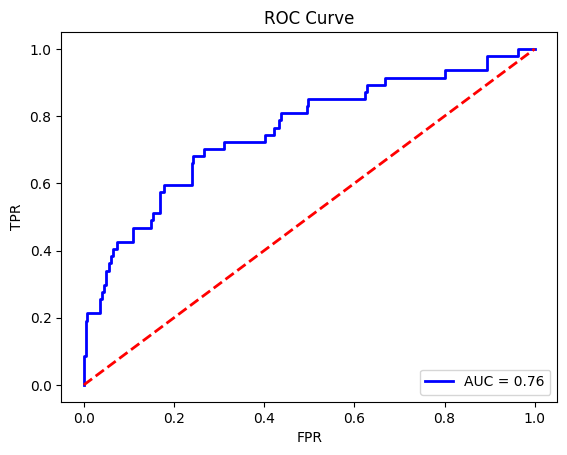

AUC-ROC Score: 0.7564820397967095 



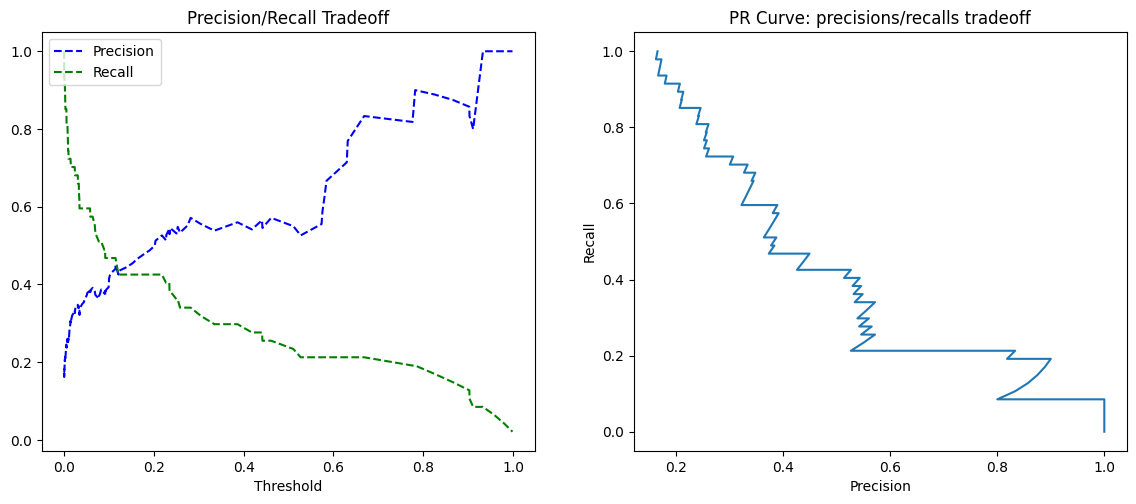

In [60]:
from xgboost import XGBClassifier

XGB_model=XGBClassifier()
XGB_model.fit(X_train,y_train)
y_pred=XGB_model.predict(X_test)
y_train_pred=XGB_model.predict(X_train)

train_accuracy=accuracy_score(y_train,y_train_pred)
train_cf_matrix=confusion_matrix(y_train,y_train_pred)
train_cl_report=classification_report(y_train,y_train_pred)

test_accuracy=accuracy_score(y_test,y_pred)
test_cf_matrix=confusion_matrix(y_test,y_pred)
test_cl_report=classification_report(y_test,y_pred)


print("TRAINING RESULTS: \n===============================")
print("Accuracy:",train_accuracy)
print("Confusion Matrix:\n",train_cf_matrix)
print("Classification Report:\n",train_cl_report)
print("TEST RESULTS: \n===============================")
print("Accuracy:",test_accuracy)
print("Confusion Matrix:\n",test_cf_matrix)
print("Classification Report:\n",test_cl_report)

#plot ROC curve with AUC-ROC score
ypp=XGB_model.predict_proba(X_test)[:,1]
fpr,tpr,th=roc_curve(y_test,ypp)
auc=roc_auc_score(y_test,ypp)

lw = 2
plt.plot(fpr, tpr, color='blue', lw=lw, label='AUC = %0.2f' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--') 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC-ROC Score:", auc, "\n")

#plot precision/recall tradeoff and PR curve for precision/recalls tradeoff
precisions, recalls, thresholds=precision_recall_curve(y_test,ypp)
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.title("Precision/Recall Tradeoff")
plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

In [61]:
#Support Vector Machine
from sklearn.svm import SVC

SVM_model = SVC(kernel='linear')
SVM_model.fit(X_train, y_train)

y_pred=SVM_model.predict(X_test)
y_train_pred=SVM_model.predict(X_train)

train_accuracy=accuracy_score(y_train,y_train_pred)
train_cf_matrix=confusion_matrix(y_train,y_train_pred)
train_cl_report=classification_report(y_train,y_train_pred)

test_accuracy=accuracy_score(y_test,y_pred)
test_cf_matrix=confusion_matrix(y_test,y_pred)
test_cl_report=classification_report(y_test,y_pred)


print("TRAINING RESULTS: \n===============================")
print("Accuracy:",train_accuracy)
print("Confusion Matrix:\n",train_cf_matrix)
print("Classification Report:\n",train_cl_report)
print("TEST RESULTS: \n===============================")
print("Accuracy:",test_accuracy)
print("Confusion Matrix:\n",test_cf_matrix)
print("Classification Report:\n",test_cl_report)



TRAINING RESULTS: 
Accuracy: 0.8511904761904762
Confusion Matrix:
 [[968  18]
 [157  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       986
           1       0.65      0.17      0.27       190

    accuracy                           0.85      1176
   macro avg       0.75      0.58      0.60      1176
weighted avg       0.83      0.85      0.81      1176

TEST RESULTS: 
Accuracy: 0.8401360544217688
Confusion Matrix:
 [[239   8]
 [ 39   8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.50      0.17      0.25        47

    accuracy                           0.84       294
   macro avg       0.68      0.57      0.58       294
weighted avg       0.80      0.84      0.81       294



#SUpport Vector Machine
# Hyperparameter Tuning

param_grid_svm = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

# GridSearchCV
grid_search_svm = GridSearchCV(estimator=SVC(random_state=42),param_grid=param_grid_svm,
                cv=3, refit=True, verbose=1)
grid_search_svm.fit(X_train, y_train)
best_params_svm = grid_search_svm.best_params_
best_estimator_svm = grid_search_svm.best_estimator_
best_estimator_svm.fit(X_train, y_train)

y_pred_tuned_svm = best_estimator_svm.predict(X_test)
accuracy_tuned_svm = accuracy_score(y_test, y_pred_tuned_svm)
cf_matrix_tuned_svm = confusion_matrix(y_test, y_pred_tuned_svm)
cl_report_tuned_svm = classification_report(y_test, y_pred_tuned_svm)

print("\nBest Parameters (Gradient Boosting):", best_params_svm)
print("Accuracy (Tuned Gradient Boosting):", accuracy_tuned_svm)
print("Confusion Matrix (Tuned Gradient Boosting):\n", cf_matrix_tuned_svm)
print("Classification Report (Tuned Gradient Boosting):\n", cl_report_tuned_svm)

# AUC-ROC
y_prob_svm = best_estimator_svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'AUC = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC-ROC Score (Support Vector Machine):", roc_auc_svm)

Results & Analysis

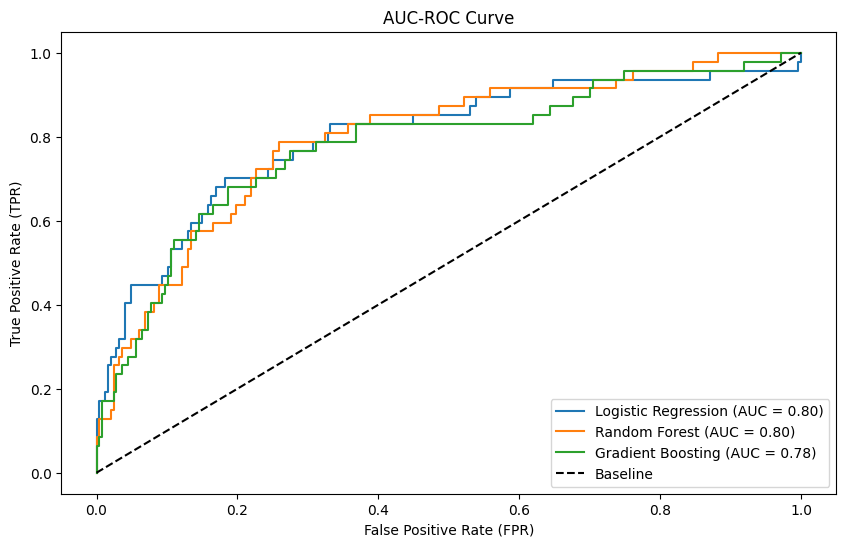


Model Evaluation Metrics:
                 Model       AUC  Precision    Recall  F1 Score
0  Logistic Regression  0.800413   0.615385  0.340426  0.438356
1        Random Forest  0.796882   0.833333  0.106383  0.188679
2    Gradient Boosting  0.779912   0.588235  0.212766  0.312500


In [62]:
models=[best_estimator_lr, best_estimator_rf,best_estimator_gb]
model_names=['Logistic Regression', 'Random Forest', 'Gradient Boosting']
plt.figure(figsize=(10, 6))
auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
# ROC
for model, name in zip(models, model_names):
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    auc = roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Baseline
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

# Consolidated Results
metrics_df = pd.DataFrame({
    'Model': model_names,
    'AUC': auc_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

print("\nModel Evaluation Metrics:")
print(metrics_df)

Looking at the data collectively, Logistic Regression model has the highest AUC score




we can tell again that the logistic regression model emerged as the top performer, achieving an F1 score of approximately 0.52 for Attrition['Yes'] and an AUC of 0.81. This outcome suggests that there is likely the existence of linear relationships between Attrition and the features and Attrition is less likely to depend on non-linear or more complex relationships with other features. Also, when dealing with imbalanced datasets, it is important to point out again that the F1 score can be a better metric than AUC. This is because F1 score balances precision and recall and is less affected by class imbalance. While accuracy score is more commonly used, it is less useful in this context as there is lesser emphasis on the minority class (Attrition - 'Yes') due to the overemphasis of better results in the majority class. Overall, considering the relatively small sample of Attrition['Yes'] data and lack of longitudinal employee data, the results from the logistic regression model is satisfactory and decent in aiding the company to predict Attrition and work on tailored interventions.
On the other hand, Random Forest and Gradient Boosting algorithms may not have shined here because of the relatively small/moderate sized dataset. For these 2 ensemble methods, it is likely that we will see better predictive statistics when there is a larger dataset in order to fully exploit their capabilities. In our context, their complexity in building the model might have led to overfitting issues with limited data size.



                              Feature  Coefficient
33            JobRole_Human Resources     2.051875
40       JobRole_Sales Representative     1.970401
20   BusinessTravel_Travel_Frequently     1.876398
44                       OverTime_Yes     1.862335
23  Department_Research & Development     1.331127
34      JobRole_Laboratory Technician     1.264995
25     EducationField_Human Resources     1.232753
24                   Department_Sales     1.217643
43               MaritalStatus_Single     1.049601
21       BusinessTravel_Travel_Rarely     0.932997


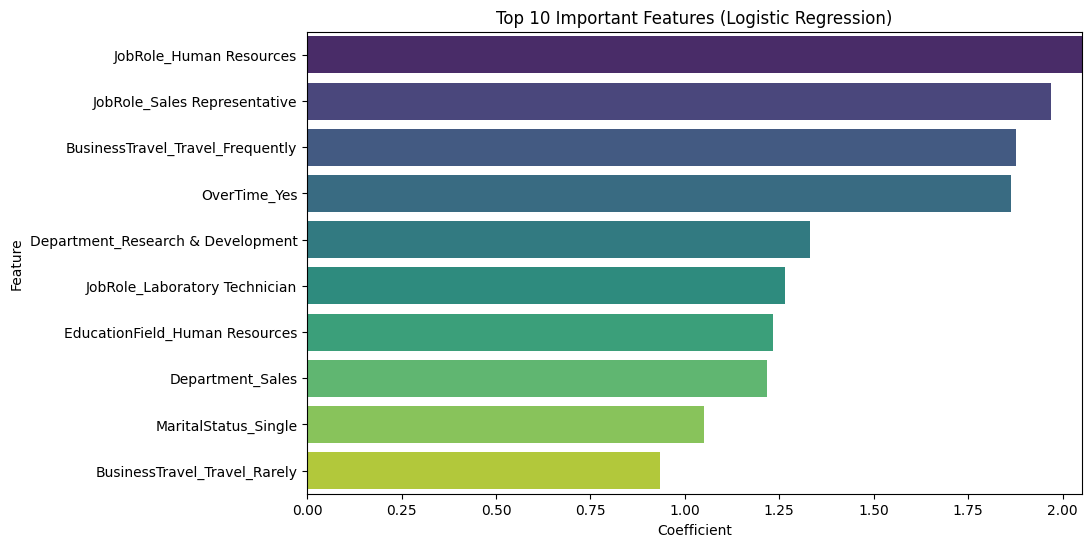

In [63]:
# Examining top 10 Features
coefficients_lr = best_estimator_lr.coef_[0]
importance_df_lr = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients_lr})
importance_df_lr = importance_df_lr.sort_values(by='Coefficient', ascending=False)
top_10_features_lr = importance_df_lr.head(10)

print(top_10_features_lr)
import matplotlib.pyplot as plt
import seaborn as sns

coefficients_lr = best_estimator_lr.coef_[0]
importance_df_lr = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients_lr})
importance_df_lr = importance_df_lr.sort_values(by='Coefficient', ascending=False)
top_10_features_lr = importance_df_lr.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_10_features_lr, palette='viridis')
plt.xlim(0, top_10_features_lr['Coefficient'].max())  # Set the x-axis limit from 0 to the maximum coefficient
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Important Features (Logistic Regression)')
plt.show()

Discussion and Conclusion:

As the logistic regression model emerged as the winner in our dataset context, we plotted the top 10 features from the model for the prediction on attrition. Below, we listed some explanation for each of the feature's possible causality in attributing attrition. We will also leave out HourlyRate and MonthlyRate due to their relatively small coefficient which reflects little to no influence vis-a-vis other features on Attrition in real-world settings.

OverTime_Yes (1.509276): Overtime work may lead to burnout and decreased job satisfaction, which can contribute to attrition.

PerformanceRating (0.417478): Surprisingly, better performance rating is associated with a higher likelihood of attrition. This, however, suggest that top employees may have attrited in light of better prospects for their careers elsewhere.

BusinessTravel_Travel_Frequently (0.194502): Frequent travel may disrupt work-life balance, possibly contributing to attrition.

NumCompaniesWorked (Coefficient: 0.140618): Employees who have worked in more companies may be more willing to seek outside opportunities in line with their working history.

YearsSinceLastPromotion (0.090782): Lack of career advancement may lead to employee dissatisfaction and contribute to attrition.

Gender_Male (0.071276): Male employees are slightly more likely to attrite than female employees. This has no working research explanation and would warrant further investigation in the company. However, taking a look across employee data might suggest that males may have a higher tendency to score higher on the other relevant features in affecting attrition.

MaritalStatus_Single (0.048594): The lack of family commitment or other financial ties might have influence single employees to look for other career opportunies elsewhere

DistanceFromHome (Coefficient: 0.034816): Commuting stress or a desire for proximity to home may play a role in influencing attrition



In this analysis, the results suggest that addressing work-life balance issues related to overtime and frequent business travel may help reduce attrition rates. Additionally, HR departments should pay attention to employees who have not received promotions for an extended period, as this group exhibits a higher likelihood of attrition. Higher performing employees are also likely to be talent-scouted by competition. A focus on recognition of work and tangible rewards should be emphasized in performance ranking systems, while employee engagement initiatives and personalised retention strategies may be useful through predicting potential employees who are thinking of leaving. Care has to be taken, however, in how HR policies are implemented to avoid the case of over-classification or targeting of employees on a basis on higher likelihood to leave the company from past data.



from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify=y)


Preprocessing is done, now we will apply the Random Forest classifier to the dataset

from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(n_estimators=10,criterion='entropy')
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)


In [ ]:
def print_score(clf, X_train,y_train,X_test,y_test,train=True):
    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report:\n {}\n".format(classification_report(y_train,clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train,clf.predict(X_train))))
        res=cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy std: \t\t {0:.4f}".format(np.std(res)))
        print("------------------------------------------------------------------")
    elif train==False:
        print("Test Result:")
        print("------------")
        print("Classification Report:\n {}\n".format(classification_report(y_test,clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test,clf.predict(X_test))))
        print("Accuracy score: {0:.4f}".format(accuracy_score(y_test,clf.predict(X_test))))
        print("------------------------------------------------------------------")
print_score(RF,X_train,y_train,X_test,y_test,train=True)

In [ ]:
print_score(RF,X_train,y_train,X_test,y_test,train=False)

In [ ]:
#Features Importance, Key features for deciding the resul

In [ ]:
#pd.Series(RF.feature_importances,index = X.columns).sort_values(ascending=False).plot(kind=bar)
#feature_imp = pd.Series(RF.feature_importances_,index= X_train.columns).sort_values(ascending=False)
feature_imp = pd.Series(RF.feature_importances_,index= X.columns).sort_values(ascending=False)
# Creating a bar plot
#feature_imp=feature_imp[0:10,]
#feature_imp=feature_imp[0:20,]
feature_imp=feature_imp[0:49,]
plt.figure(figsize=(20,15))

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score',fontsize=8)
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# According to Random Forest Classifier the top most important features are age, monthly income,years at company, hourly rate, distance from home etc
and the least imporant feature is JobRole_Manager

In [ ]:
data_df.shape

In [ ]:
data_df.info()

there is 16.12% attrition rate. 83.88% employee stayed.